In [5]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.optimizers import Adam, RMSprop
from keras.regularizers import l2
from keras.layers.normalization import BatchNormalization
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as asc
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train_path = 'FER2013-Data_Extracted_7_emo/train'
valid_path = 'FER2013-Data_Extracted_7_emo/valid'
test_path = 'FER2013-Data_Extracted_7_emo/test'

In [7]:
train_batches = ImageDataGenerator(rescale=1./255, horizontal_flip=True).flow_from_directory(
    directory=train_path, target_size=(48,48), color_mode = 'grayscale', batch_size=70)
valid_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=valid_path, target_size=(48,48), color_mode = 'grayscale', batch_size=50)
test_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=test_path, target_size=(48,48), color_mode = 'grayscale', batch_size=50, shuffle=False)

Found 28700 images belonging to 7 classes.
Found 3500 images belonging to 7 classes.
Found 3500 images belonging to 7 classes.


In [8]:
test_batches.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}

(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

## Conv Net

In [6]:
model = Sequential()

input_shape = (48,48,1)
model.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units = 1024, activation = 'relu', kernel_regularizer = l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units = 512, activation = 'relu', kernel_regularizer = l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units = 256, activation = 'relu', kernel_regularizer = l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7))
model.add(Activation('softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      

^^Note the number of trainable parameters

## Compile and Train

In [8]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
%%time
H = model.fit_generator(generator=train_batches, steps_per_epoch=410, 
    validation_data=valid_batches, validation_steps=70, epochs=50, verbose=2)


Epoch 1/50
 - 265s - loss: 2.9863 - accuracy: 0.2117 - val_loss: 2.3148 - val_accuracy: 0.2277
Epoch 2/50
 - 259s - loss: 2.5969 - accuracy: 0.2844 - val_loss: 1.9462 - val_accuracy: 0.3540
Epoch 3/50
 - 257s - loss: 2.3496 - accuracy: 0.3285 - val_loss: 1.7181 - val_accuracy: 0.4017
Epoch 4/50
 - 259s - loss: 2.2056 - accuracy: 0.3569 - val_loss: 1.6949 - val_accuracy: 0.4103
Epoch 5/50
 - 257s - loss: 2.0872 - accuracy: 0.3793 - val_loss: 1.8895 - val_accuracy: 0.4351
Epoch 6/50
 - 259s - loss: 1.9741 - accuracy: 0.4029 - val_loss: 1.6915 - val_accuracy: 0.4714
Epoch 7/50
 - 257s - loss: 1.8967 - accuracy: 0.4225 - val_loss: 1.5848 - val_accuracy: 0.4509
Epoch 8/50
 - 259s - loss: 1.8200 - accuracy: 0.4388 - val_loss: 1.8435 - val_accuracy: 0.4523
Epoch 9/50
 - 257s - loss: 1.7446 - accuracy: 0.4599 - val_loss: 1.6256 - val_accuracy: 0.4911
Epoch 10/50
 - 259s - loss: 1.6843 - accuracy: 0.4815 - val_loss: 1.3806 - val_accuracy: 0.4911
Epoch 11/50
 - 257s - loss: 1.6261 - accuracy: 0

## Plot Graph

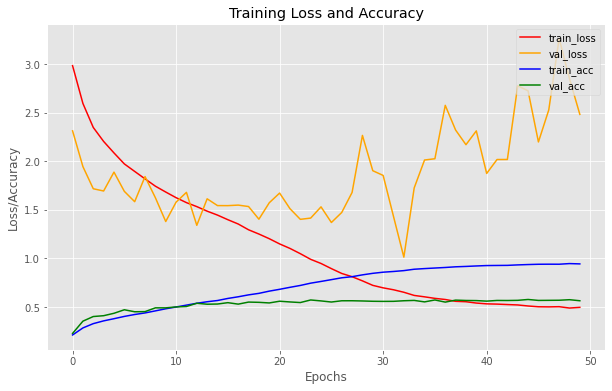

In [10]:
epochs = 50

plt.style.use("ggplot")
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss", color='r')
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss", color='orange')
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc", color='b')
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc", color='green')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

plt.savefig("plot.png")

## Testing

In [12]:
test_labels = test_batches.classes

In [13]:
test_labels

array([0, 0, 0, ..., 6, 6, 6])

In [14]:
predictions = model.predict_generator(generator=test_batches, steps=70, verbose=0)

In [15]:
predictions.argmax(axis=1)

array([6, 3, 6, ..., 6, 2, 6], dtype=int64)

In [16]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
print(f"Confusion Matrix:\n{cm}")
accuracy = asc(y_true=test_labels, y_pred=predictions.argmax(axis=1))
print(f"\nAccuracy:{accuracy}")

Confusion Matrix:
[[223   0  46  34 102   6  80]
 [ 14  25   2   1   6   2   5]
 [ 56   1 186  24 164  28  69]
 [ 24   0  21 612  79   7  47]
 [ 57   1  40  48 334   5 109]
 [ 18   1  43  23  31 272  28]
 [ 39   0  22  40 138   2 385]]

Accuracy:0.582


## Saving Model

In [17]:
fer_json = model.to_json()
with open("fer.json","w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer_wts.h5")

## Load and Predict

In [4]:
from keras.models import model_from_json

In [9]:
model = model_from_json(open("fer.json", "r").read())

In [10]:
model.load_weights("fer_wts.h5")

In [24]:
from PIL import Image
from skimage import transform
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')
    np_image = transform.resize(np_image, (48, 48, 1))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load('test3.jpg')
x = model.predict(image)
x

array([[8.8984927e-04, 7.9114789e-06, 4.1089043e-02, 1.7840829e-02,
        9.0079165e-01, 3.9214700e-02, 1.6605313e-04]], dtype=float32)

## Confusion Matrix Visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn.metrics import confusion_matrix

In [2]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

Normalized confusion matrix
[[0.45417515 0.         0.09368635 0.06924644 0.20773931 0.01221996
  0.16293279]
 [0.25454545 0.45454545 0.03636364 0.01818182 0.10909091 0.03636364
  0.09090909]
 [0.10606061 0.00189394 0.35227273 0.04545455 0.31060606 0.0530303
  0.13068182]
 [0.03037975 0.         0.02658228 0.77468354 0.1        0.00886076
  0.05949367]
 [0.0959596  0.0016835  0.06734007 0.08080808 0.56228956 0.00841751
  0.18350168]
 [0.04326923 0.00240385 0.10336538 0.05528846 0.07451923 0.65384615
  0.06730769]
 [0.06230032 0.         0.03514377 0.06389776 0.22044728 0.00319489
  0.61501597]]


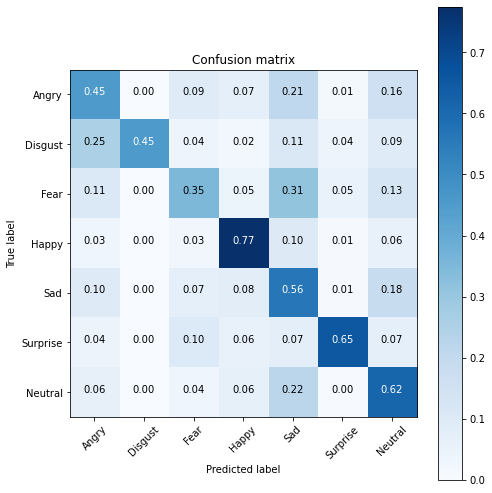

In [19]:
names = ('Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral')

plt.figure(figsize=(7,7))
plot_confusion_matrix(cm, names, normalize=True)